In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
file = pd.read_csv('Insurance.csv')
data = file.copy()
data

,Age,Sex,BMI,Smoker,Region,Insurance Charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,10600.54830
1334,18,female,31.920,no,northeast,2205.98080
1335,18,female,36.850,no,southeast,1629.83350
1336,21,female,25.800,no,southwest,2007.94500


In [3]:
data.describe(include='all')

,Age,Sex,BMI,Smoker,Region,Insurance Charges
count,1338.000000,1338,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,male,NaN,no,southeast,NaN
freq,NaN,676,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,16639.912515


In [4]:
data.isnull().sum()

Age                  0
Sex                  0
BMI                  0
Smoker               0
Region               0
Insurance Charges    0
dtype: int64

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29080\1798110951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Insurance Charges'])


<Axes: xlabel='Insurance Charges', ylabel='Density'>

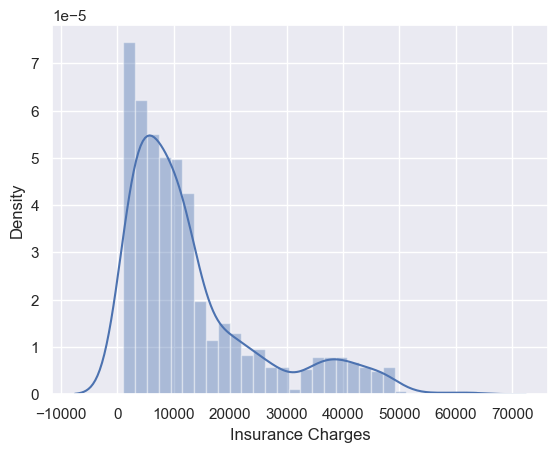

In [5]:
sns.distplot(data['Insurance Charges'])

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29080\613475808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

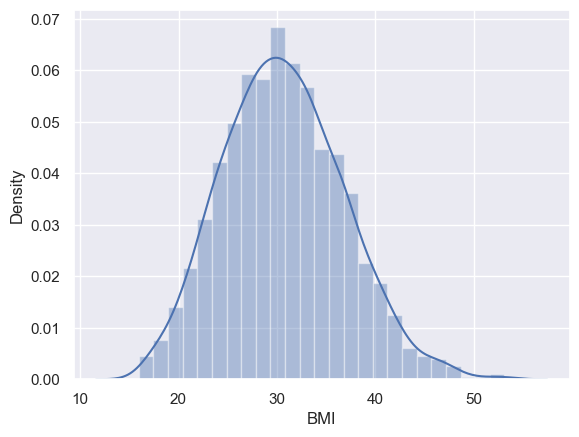

In [6]:
sns.distplot(data['BMI'])

In [7]:
data.describe(include='all')

,Age,Sex,BMI,Smoker,Region,Insurance Charges
count,1338.000000,1338,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,male,NaN,no,southeast,NaN
freq,NaN,676,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,16639.912515


## VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Age', 'BMI']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [9]:
vif

,VIF,features
0,7.457006,Age
1,7.457006,BMI


## Creating Dummies

In [10]:
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [11]:
data_with_dummies.columns

Index(['Age', 'BMI', 'Insurance Charges', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest'],
      dtype='object')

In [12]:
cols = ['Sex_male', 'Smoker_yes', 'Region_northwest', 'Region_southeast', 'Region_southwest']

In [13]:
data_with_dummies[cols] = data_with_dummies[cols].astype(int)

In [14]:
data_with_dummies

,Age,BMI,Insurance Charges,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,18,33.770,1725.55230,1,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0
3,33,22.705,21984.47061,1,0,1,0,0
4,32,28.880,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,1


## Transformations

In [15]:
log_price = np.log(data_with_dummies['Insurance Charges'])
data_with_dummies['log_insurance_charges'] = log_price

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29080\1039525453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies['log_insurance_charges'])


<Axes: xlabel='log_insurance_charges', ylabel='Density'>

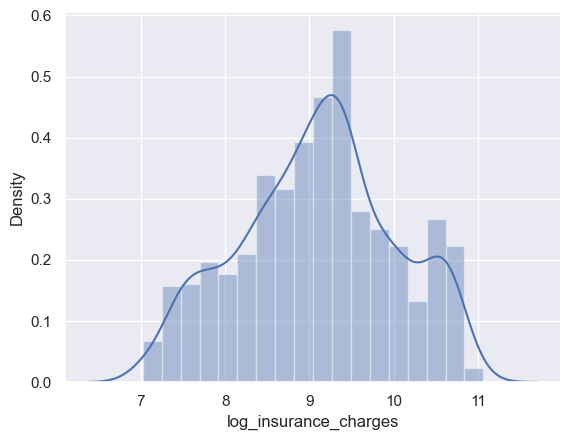

In [16]:
sns.distplot(data_with_dummies['log_insurance_charges'])

In [17]:
data_with_dummies = data_with_dummies.drop(['Insurance Charges'], axis=1)

In [18]:
data_with_dummies

,Age,BMI,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,log_insurance_charges
0,19,27.900,0,1,0,0,1,9.734176
1,18,33.770,1,0,0,1,0,7.453302
2,28,33.000,1,0,0,1,0,8.400538
3,33,22.705,1,0,1,0,0,9.998092
4,32,28.880,1,0,1,0,0,8.260197
...,...,...,...,...,...,...,...,...
1333,50,30.970,1,0,1,0,0,9.268661
1334,18,31.920,0,0,0,0,0,7.698927
1335,18,36.850,0,0,0,1,0,7.396233
1336,21,25.800,0,0,0,0,1,7.604867


## Standardization

In [19]:
targets = data_with_dummies['log_insurance_charges']
inputs = data_with_dummies.drop(['log_insurance_charges'], axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [21]:
inputs_scaled = scaler.transform(inputs)

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state = 44)

## Regression

In [23]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
y_hat = reg.predict(x_train)

In [25]:
y_hat

array([ 8.60689068,  9.53301933, 10.46921127, ...,  8.10071145,
        8.77470857,  9.28058746])

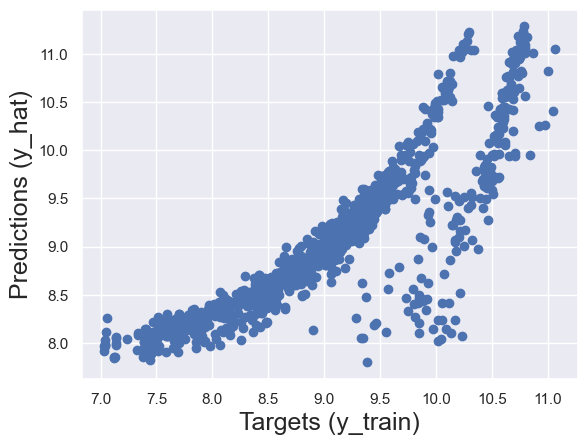

In [26]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [27]:
reg.score(x_test, y_test)

0.753802827784551

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29080\329104437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

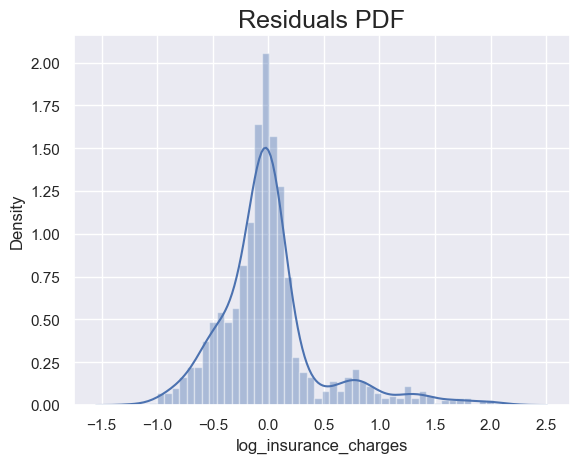

In [28]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

## Testing

In [29]:
y_hat_test = reg.predict(x_test)

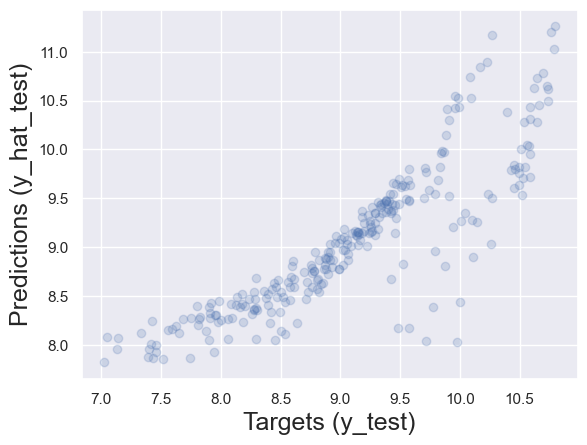

In [30]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [31]:
df_predict = pd.DataFrame(y_hat_test, columns = ['Predictions'])
df_predict.head()

,Predictions
0,8.592366
1,8.197488
2,8.955249
3,9.974579
4,8.430836


In [32]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.463427
1    7.628189
2    8.915421
3    9.871068
4    7.921180
Name: log_insurance_charges, dtype: float64

In [33]:
df_predict['Target'] = y_test
df_predict

,Predictions,Target
0,8.592366,8.463427
1,8.197488,7.628189
2,8.955249,8.915421
3,9.974579,9.871068
4,8.430836,7.921180
...,...,...
263,8.960769,9.794192
264,8.575915,8.800949
265,7.952312,7.395397
266,10.000077,10.514271


In [34]:
df_predict['Residual'] = df_predict['Target'] - df_predict['Predictions']

In [35]:
df_predict

,Predictions,Target,Residual
0,8.592366,8.463427,-0.128939
1,8.197488,7.628189,-0.569298
2,8.955249,8.915421,-0.039828
3,9.974579,9.871068,-0.103511
4,8.430836,7.921180,-0.509656
...,...,...,...
263,8.960769,9.794192,0.833422
264,8.575915,8.800949,0.225034
265,7.952312,7.395397,-0.556916
266,10.000077,10.514271,0.514194


In [36]:
df_predict['Difference%'] = np.absolute(df_predict['Residual']/df_predict['Target']*100)

In [37]:
df_predict

,Predictions,Target,Residual,Difference%
0,8.592366,8.463427,-0.128939,1.523487
1,8.197488,7.628189,-0.569298,7.463087
2,8.955249,8.915421,-0.039828,0.446732
3,9.974579,9.871068,-0.103511,1.048630
4,8.430836,7.921180,-0.509656,6.434093
...,...,...,...,...
263,8.960769,9.794192,0.833422,8.509353
264,8.575915,8.800949,0.225034,2.556928
265,7.952312,7.395397,-0.556916,7.530570
266,10.000077,10.514271,0.514194,4.890440


In [38]:
df_predict.describe()

,Predictions,Target,Residual,Difference%
count,268.000000,268.000000,268.000000,268.000000
mean,9.067463,9.090148,0.022685,3.244394
std,0.750269,0.886921,0.439488,3.511711
min,7.819740,7.022756,-1.040321,0.000359
25%,8.464729,8.469941,-0.183913,0.788810
50%,9.016436,9.134403,-0.021407,1.865799
75%,9.487806,9.700663,0.146811,4.872813
max,11.258870,10.795986,1.946084,19.499379


In [41]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_predict.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
191,9.34,9.34,0.00,0.00
211,8.90,8.90,-0.00,0.01
167,9.13,9.13,0.00,0.04
50,8.06,8.06,0.00,0.06
41,8.88,8.88,-0.01,0.06
37,9.16,9.15,-0.01,0.08
156,10.63,10.62,-0.01,0.08
19,9.82,9.83,0.01,0.09
232,9.44,9.43,-0.01,0.11
130,9.24,9.25,0.01,0.12
